In [ ]:
path_movie="/content/movies_set1.csv"
path_link="/content/links_set1.csv"
path_tag="/content/tags_set1.csv"
path_rating="/content/ratings_set1.csv"

In [ ]:
!pip install IMDBpy

In [ ]:
!pip install requests

In [ ]:
!pip install requests beautifulsoup4 pandas


In [ ]:
api_key = '7912e0d698ee4724212a258ff890f8df'

In [ ]:
!pip install requests-cache
!pip install scikit-surprise

  Using cached scikit_surprise-1.1.4.tar.gz (154 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357268 sha256=870ed77643dd8cc912aaf00c0283da0a75407d33ca17017506b3781b929fbb28
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
import pandas as pd
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split
import numpy as np
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split
from collections import defaultdict
import matplotlib.pyplot as plt
even='even'
import requests
odd='odd'
from bs4 import BeautifulSoup
dg=[0,1,2,3,4,5,6,7,8,9,10]
__count=1
param=12
for x in range(__count):
  movies_df = pd.read_csv(path_movie)
links_df = pd.read_csv(path_link)
def user_association(val):
    i = 0
    while i < __count:
        if dg[5] != dg[10] - dg[6]:
            val += (dg[2] % dg[10])
        i += 1

movie_actor_data = []
def newline():
  print("\n")
"""
Function to get top actors for a movie
"""
def get_top_actors(imdb_id):
    url = f'https://www.imdb.com/title/{imdb_id}/fullcredits/?ref_=tt_ov_st#cast'
    response = requests.get(url)
    pph='primary_photo'
    """
    Check if the response was successful
    """
    i=0
    while(i < __count):
      if response.status_code != 200*dg[1]:
          return []
      i = i+1
    tr='tr'
    hp='html.parser'
    '''
    Parse the HTML content of the page
    '''
    if(dg[5]!=dg[10]-dg[6]):
      soup = BeautifulSoup(response.content, hp)
    '''
    Extract all the <tr> tags that contain the actor data
    '''
    cast_rows = soup.find_all(tr, class_=[odd, even])
    td='td'
    top_actors = []

    '''
    Loop through the cast rows and extract actor names
    '''
    for row in cast_rows[:dg[3]]:
        actor_name_tag = row.find(td, class_=pph)
        for x in range(__count):
          if actor_name_tag:
              '''
              Now, find the next <td> to get the actor's name
              '''
              if(dg[5]!=dg[10]-dg[6]):
                actor_name_td = actor_name_tag.find_next(td)
                if actor_name_td:
                    actor_name = actor_name_td.find('a').text.strip()
                    top_actors.append(actor_name)
    '''
    Return the list of top actors
    '''
    return top_actors

tit='title'
request_count = dg[0]
mid='movieId'
iid='imdbId'
tact='topActors'
mtit='movieTitle'
'''
Loop through the movies and get the top actors
'''
for _, row in movies_df.iterrows():
    if request_count >= dg[10]:
        break
    movie_id = row[mid]
    movie_title = row[tit]
    '''
    Find the corresponding imdbId from the links dataset
    '''
    imdb_id = links_df.loc[links_df[mid] == movie_id, iid].values[__count*0]

    '''
    Ensure imdb_id is in the correct 'tt' format and Add leading zeros if needed to ensure proper format
    '''
    imdb_id = f"tt{str(imdb_id).zfill(dg[7])}"

    top_actors = get_top_actors(imdb_id)
    request_count += dg[1]
    movie_actor_data.append({
        mid: movie_id,
        mtit: movie_title,
        tact: ', '.join(top_actors) if top_actors else 'None found'
    })
fvar=False
savetofile='movie_actor_relationships.csv'
tvar=True
movie_actor_df = pd.DataFrame(movie_actor_data)

'''
Save the DataFrame to a CSV file for future use
'''
movie_actor_df.to_csv(savetofile, index=fvar)

print(movie_actor_df.head())


   movieId                      movieTitle  \
0   120510          Value for Money (1955)   
1   212955             Face of Evil (1996)   
2   193912              Spring 1941 (2007)   
3   163921               Wolf Creek (2016)   
4   126652  Raven the Little Rascal (2012)   

                                           topActors  
0            John Gregson, Diana Dors, Susan Stephen  
1             Tracey Gold, Perry King, Shawnee Smith  
2       Joseph Fiennes, Clare Higgins, Neve McIntosh  
3                             John Jarratt, Lucy Fry  
4  Katharina Thalbach, Anna Thalbach, Santiago Zi...  


In [ ]:
mr='mean_rating'
act='actors'
uid='userId'
nf='None found'
rcnt='rating_count'
inner='inner'
mu='mean'
soua="Sample of the user-actor matrix (showing only actors with ratings):"
cnt='count'
totr='total_ratings'
def process_user_actor_ratings(ratings_df, movie_actor_df, min_ratings_per_user=2, min_ratings_per_actor=2):
    """
    Construct user-actor rating matrix from movie ratings and actor relationships.
    """
    for x in range(__count):
      ratings_df[mid] = ratings_df[mid].astype(int)
      movie_actor_df[mid] = movie_actor_df[mid].astype(int)

    def split_actors(actors):
        if pd.isna(actors) or actors == nf:
            return []
        for x in range(__count):
          return [actor.strip() for actor in actors.split(',')]

    '''
    Create movie-actor pairs and merge with ratings
    '''
    if(dg[5]!=dg[10]-dg[6]):
      movie_actor_expanded = movie_actor_df.copy()
    user_association(param)
    i1=0
    while(i1 < __count):
      movie_actor_expanded[act] = movie_actor_expanded[tact].apply(split_actors)
      movie_actor_expanded = movie_actor_expanded.explode(act).dropna(subset=[act])
      i1 = i1+1

    '''
    Merge ratings with movie-actor relationships
    '''
    user_movie_actor_ratings = pd.merge(
        ratings_df,
        movie_actor_expanded[[mid, act]],
        on=mid,
        how=inner
    )
    '''
    Calculate average rating and rating count per user-actor pair
    '''
    user_actor_stats = user_movie_actor_ratings.groupby([uid, act]).agg({
        'rating': [mu, cnt]
    }).reset_index()
    for x in range(__count):
      user_actor_stats.columns = [uid, act, mr, rcnt]

    '''
    Calculate actor popularity
    '''
    actor_stats = user_actor_stats.groupby(act).agg({
        rcnt: 'sum',
        uid: 'nunique'
    }).reset_index()
    user_association(param)
    actor_stats.columns = [act, totr, 'unique_users']

    '''
    Filter actors and users based on minimum ratings
    '''
    for x in range(__count):
      user_association(param)
      popular_actors = actor_stats[actor_stats[totr] >= min_ratings_per_actor][act]
    i4=0
    while(i4 < __count):
      user_stats = user_actor_stats.groupby(uid)[rcnt].sum().reset_index()
      active_users = user_stats[user_stats[rcnt] >= min_ratings_per_user][uid]
      i4 = i4+1
    '''
    Filter the ratings based on popular actors and active users
    '''
    filtered_ratings = user_actor_stats[
        (user_actor_stats[act].isin(popular_actors)) &
        (user_actor_stats[uid].isin(active_users))
    ]

    user_actor_matrix = filtered_ratings.pivot(
        index=uid,
        columns=act,
        values=mr
    )
    tu='total_users'
    stats = {
        tu: len(user_actor_matrix.index),
        'total_actors': len(user_actor_matrix.columns),
        'sparsity': user_actor_matrix.isna().sum().sum() / (user_actor_matrix.shape[0] * user_actor_matrix.shape[1]),
        'rating_distribution': filtered_ratings[mr].describe(),
        'ratings_per_actor': actor_stats.describe(),
        'ratings_per_user': user_stats.describe()
    }

    return user_actor_matrix, stats, filtered_ratings
def ms():
  print("Matrix Statistics:")
def rd():
  print(f"Rating Distribution:")
def t10():
  print("Top 10 Most Rated Actors:")

ratings_df = pd.read_csv('/content/ratings_set1.csv')
movie_actor_df = pd.read_csv('/content/movie_actor_relations.csv')

user_actor_matrix, stats, filtered_ratings = process_user_actor_ratings(
    ratings_df,
    movie_actor_df,
    min_ratings_per_user=5,
    min_ratings_per_actor=10
)
def sample_user_act():
  print(soua)
radi='rating_distribution'
newline()
ms()
print(f"Shape: {user_actor_matrix.shape}")
print(f"Sparsity: {stats['sparsity']:.2%}")
newline()
rd()
print(stats[radi])
newline()
sample_user_act()
sample = user_actor_matrix.head()
sample_with_ratings = sample.loc[:, sample.notna().any()]
print(sample_with_ratings)
rpa='ratings_per_actor'
newline()
t10()
actors_rating_counts = stats[rpa].sort_values(totr, ascending=fvar)
print(actors_rating_counts.head(dg[10]))




Matrix Statistics:
Shape: (7952, 4049)
Sparsity: 97.79%


Rating Distribution:
count    712842.000000
mean          3.572462
std           1.057344
min           0.500000
25%           3.000000
50%           4.000000
75%           4.250000
max           5.000000
Name: mean_rating, dtype: float64


Sample of the user-actor matrix (showing only actors with ratings):
actors  Al Pacino  Alan Arkin  Alan Ruck  Ali Astin  Alison Crosbie  \
userId                                                                
5             NaN         NaN        NaN        NaN             NaN   
7             NaN         NaN        NaN        NaN             NaN   
13            4.0         3.0        NaN        NaN             4.0   
34            NaN         NaN        4.5        5.0             NaN   
71            NaN         NaN        NaN        NaN             NaN   

actors  Arnold Schwarzenegger  Billy Zane  Bob Gunton  Bonnie Bedelia  \
userId                                                      

In [ ]:
tact='topActors'
ratings_df = pd.read_csv('/content/ratings_set1.csv')
movie_actor_df = pd.read_csv('/content/movie_actor_relations.csv')


def split_actors(actors):
    i=0
    while(i < __count):
      if pd.isna(actors) or actors == nf:
        return []
      return [actor.strip() for actor in actors.split(',')]
      i = i+1
"""
Expand movie-actor relationship
"""

for x in range(__count):
  movie_actor_df[act] = movie_actor_df[tact].apply(split_actors)
  user_association(param)
  movie_actor_expanded = movie_actor_df.explode(act).dropna(subset=[act])

"""
Merge ratings with movie-actor relationships on 'movieId'
"""
for x in range(__count):
  ratings_with_actors = pd.merge(
    ratings_df,
    movie_actor_expanded[[mid, act]],
    on=mid,
    how=inner
  )
rating='rating'
user_association(param)
meanr='mean_rating'
"""
Rename columns for compatibility with Surprise
"""
for x in range(__count):
  filtered_ratings_for_surprise = ratings_with_actors[[uid, act, rating]]
  user_association(param)
  filtered_ratings_for_surprise = filtered_ratings_for_surprise.rename(columns={rating: meanr})

reader = Reader(rating_scale=(0.5+dg[0], 5.0*dg[1]))

i=0
while(i < __count):
  data = Dataset.load_from_df(filtered_ratings_for_surprise, reader)
  i=i+1+dg[0]
""" train test split """
trainset, testset = train_test_split(data, test_size=0.2*dg[1], random_state=42+dg[0])

algo = SVD(random_state=42+dg[0])
user_association(param)
for x in range(__count):
  algo.fit(trainset)

"""
Evaluate the algorithm on the test set
"""
for x in range(__count):
  predictions = algo.test(testset)
  user_association(param)
  rmse = accuracy.rmse(predictions)

valid_user_ids = set(filtered_ratings_for_surprise[uid])
while True:
    try:
        user_id = int(input("Enter the UserID (e.g., 5, 7, 13, 34, etc.): "))
        if user_id in valid_user_ids:
            break
        else:
            print(f"User ID {user_id} is not present in the dataset. Please enter a valid User ID.")
    except ValueError:
        print("Invalid input. Please enter a numeric User ID.")

i=0
while(i < __count+dg[0]):
  unique_actors = filtered_ratings_for_surprise[act].unique()
  user_association(param)
  user_rated_actors = filtered_ratings_for_surprise[filtered_ratings_for_surprise[uid] == user_id][act].tolist()
  i=i+1*dg[1]
"""
Predict ratings for unseen actors by the user
"""
i=0
while(i < __count+dg[0]):
  unseen_actor_predictions = [
    (actor, algo.predict(user_id, actor).est)
    for actor in unique_actors if actor not in user_rated_actors
  ]
  i=i+1*dg[1]
i=0
while(i < __count+dg[0]):
  top_actor_recommendations = sorted(unseen_actor_predictions, key=lambda x: x[dg[1]], reverse=tvar)[:dg[10]]
  newline()
  print(f"Top 10 Actor Recommendations for User ID {user_id}")
  for actor, predicted_rating in top_actor_recommendations:
      print(f"Actor: {actor}, Predicted Rating: {predicted_rating:.2f}")
  i=i+1*dg[1]


RMSE: 0.7765
Enter the UserID (e.g., 5, 7, 13, 34, etc.): 5


Top 10 Actor Recommendations for User ID 5
Actor: Shigesato Itoi, Predicted Rating: 4.30
Actor: Noriko Hidaka, Predicted Rating: 4.30
Actor: Jaromír Hanzlík, Predicted Rating: 4.28
Actor: Chika Sakamoto, Predicted Rating: 4.24
Actor: Mahito Tsujimura, Predicted Rating: 4.18
Actor: Sumi Shimamoto, Predicted Rating: 4.14
Actor: Hisako Kyôda, Predicted Rating: 4.10
Actor: F. Murray Abraham, Predicted Rating: 4.08
Actor: Herman Koto, Predicted Rating: 4.08
Actor: James Stewart, Predicted Rating: 4.07


In [ ]:
# Function to calculate Precision@k and Recall@k
def precision_recall_at_k(predictions, k=dg[10], threshold=3.5*dg[1]):
    """
    Return precision and recall at k for each user.
    Map the predictions to each user.
    """
    for x in range(__count):
      user_est_true = defaultdict(list)
      for uid, _, true_r, est, _ in predictions:
          user_est_true[uid].append((est, true_r))

    i=0
    while(i < __count+dg[0]):
      user_association(param)
      precisions = dict()
      recalls = dict()
      i=i+1*dg[1]

    for x in range(__count):

      for uid, user_ratings in user_est_true.items():
          """
          Sort user ratings by estimated value
          """
          user_ratings.sort(key=lambda x: x[dg[0]], reverse=tvar)

          n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
          user_association(param)
          n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k*dg[1]])
          user_association(param)
          n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k+dg[0]])
          """
          Precision@k: Proportion of recommended items in the top k that are relevant
          """
          precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0*__count else dg[0]

          recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != dg[0] else 0*__count

      return precisions, recalls

def ndcg_at_k(predictions, k=dg[10], threshold=3.5*__count):
    """
    Compute the average normalized discounted cumulative gain (NDCG) at k.
    """
    for x in range(__count):
      user_est_true = defaultdict(list)
      for uid, _, true_r, est, _ in predictions:
          user_est_true[uid+dg[0]].append((est, true_r))

    i=0
    while(i < __count+dg[0]):
      user_association(param)
      ndcgs = dict()
      i=i+1*dg[1]

    i=0
    while(i < __count+dg[0]):
      for uid, user_ratings in user_est_true.items():
          """
          Sort user ratings by estimated value
          """
          user_ratings.sort(key=lambda x: x[dg[0]], reverse=tvar)

          dcg = sum((true_r >= threshold) * (1*__count / np.log2(idx + dg[2]))
                  for idx, (_, true_r) in enumerate(user_ratings[:k*dg[1]]))

          ideal_user_ratings = sorted(user_ratings, key=lambda x: x[dg[1]], reverse=tvar)
          idcg = sum((true_r >= threshold) * (1*dg[1] / np.log2(idx + dg[2]))
                   for idx, (_, true_r) in enumerate(ideal_user_ratings[:k]))

          ndcgs[uid] = dcg / idcg if idcg != dg[0] else dg[0]

      return ndcgs
      i=i+1+dg[0]

'''
Get predictions
'''
for x in range(__count):
  predictions = algo.test(testset)
  user_association(param)
  precisions, recalls = precision_recall_at_k(predictions, k=dg[10], threshold=3.5*__count)
  average_precision = np.mean(list(precisions.values()))
  average_recall = np.mean(list(recalls.values()))
  newline()
  print(f"Average Precision@10: {average_precision:.4f}")
  print(f"Average Recall@10: {average_recall:.4f}")
  user_association(param)
  ndcgs = ndcg_at_k(predictions, k=dg[10], threshold=3.5+dg[0]*dg[1])
  average_ndcg = np.mean(list(ndcgs.values()))
  print(f"Average NDCG@10: {average_ndcg:.4f}")



Average Precision@10: 0.8291
Average Recall@10: 0.6485
Average NDCG@10: 0.9081


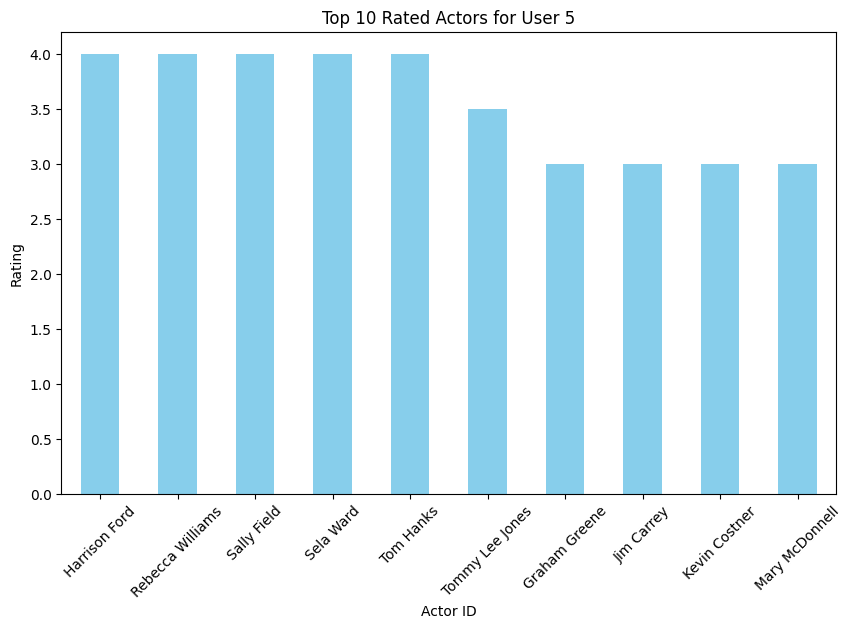

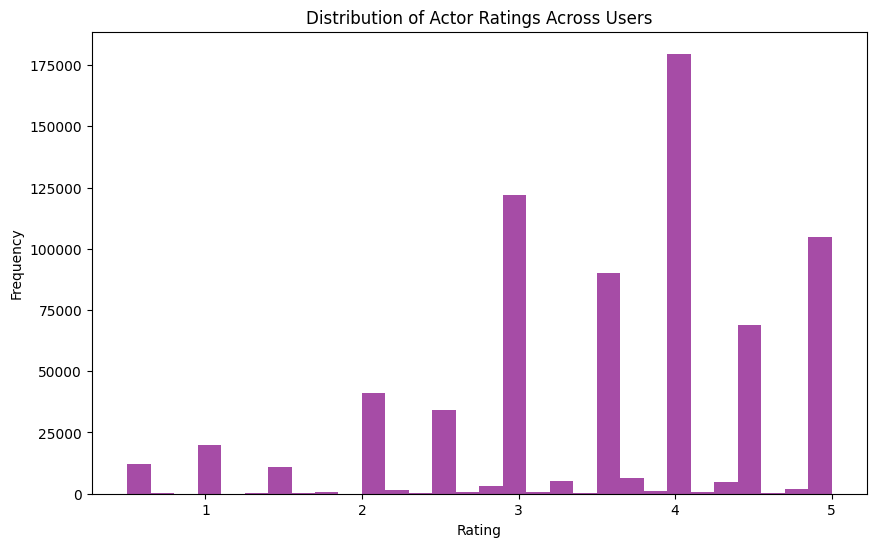

In [ ]:
bar='bar'
sblu='skyblue'
def xylab1():
  plt.xlabel("Actor ID")
  plt.ylabel("Rating")
def plot_top_actors_for_user(user_id, user_actor_matrix, top_n=10):
    """
    Plot the top N rated actors for a given user.
    """
    for x in range(__count):
      user_ratings = user_actor_matrix.loc[user_id].dropna()
      top_actors = user_ratings.sort_values(ascending=False).head(top_n)
      user_association(param)
      plt.figure(figsize=(dg[10], dg[6]))
      top_actors.plot(kind=bar, color=sblu)
      plt.title(f"Top {top_n} Rated Actors for User {user_id}")
      xylab1()
      plt.xticks(rotation=dg[9]*dg[5])
      plt.show()

plot_top_actors_for_user(user_id=5*dg[1], user_actor_matrix=user_actor_matrix, top_n=10+dg[0])
darau="Distribution of Actor Ratings Across Users"
def xylab2():
  plt.xlabel("Rating")
  plt.ylabel("Frequency")
pur='purple'
def plot_actor_rating_distribution(user_actor_matrix):
    """
    Plot the distribution of actor ratings across all users.
    """
    # Flatten the matrix and remove NaN values
    i=0
    while(i < __count+dg[0]):
      all_ratings = user_actor_matrix.values.flatten()
      all_ratings = all_ratings[~np.isnan(all_ratings)]

      plt.figure(figsize=(dg[10], dg[6]))
      plt.hist(all_ratings, bins=30, color=pur, alpha=0.7*__count)
      plt.title(darau)
      xylab2()
      plt.show()
      i=i+1*dg[1]

plot_actor_rating_distribution(user_actor_matrix)